In [3]:
import pandas as pd

transactionData = 'QVI_transaction_data.xlsx'
df_transactionData = pd.read_excel(transactionData)

customerData = 'QVI_purchase_behaviour.csv'
df_customerData = pd.read_csv(customerData)

In [19]:
numeric_columns = ['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES', 'LYLTY_CARD_NBR']  

numeric_check = df_transactionData[numeric_columns].applymap(lambda x: isinstance(x, (int, float)))

df_transactionData['DATE'] = pd.to_datetime(df_transactionData['DATE'], unit='D', errors='coerce') + pd.Timedelta(days=25569)

print("Numeric Check for Transaction Data:")
print(numeric_check)

print("\nDataFrame with Converted DATE column:")
print(df_transactionData)


Numeric Check for Transaction Data:
        STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_QTY  TOT_SALES  \
0            True            True    True      True      True       True   
1            True            True    True      True      True       True   
2            True            True    True      True      True       True   
3            True            True    True      True      True       True   
4            True            True    True      True      True       True   
...           ...             ...     ...       ...       ...        ...   
264831       True            True    True      True      True       True   
264832       True            True    True      True      True       True   
264833       True            True    True      True      True       True   
264834       True            True    True      True      True       True   
264835       True            True    True      True      True       True   

        LYLTY_CARD_NBR  
0                 True  
1

In [21]:
product_summary = df_transactionData['PROD_NAME'].value_counts()

print("Summary of PROD_NAME:")
print(product_summary)

Summary of PROD_NAME:
PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64


In [ ]:
import re

product_words = ' '.join(df['PROD_NAME'].str.replace('[^a-zA-Z\s]', '').str.split().sum())

product_words = ' '.join(re.findall(r'\b\w+\b', product_words))

word_counts = pd.Series(product_words.split()).value_counts().reset_index()      #Took 42.2s to execute
word_counts.columns = ['word', 'frequency']

sorted_words = word_counts.sort_values(by='frequency', ascending=False)

print("Sorted Words by Frequency:")
print(sorted_words)


In [47]:
df_chips = df[~df['PROD_NAME'].str.contains('salsa', case=False)]

In [48]:
summary_stats = df_chips.describe()

null_info = df_chips.info()

print("Summary Statistics:")
print(summary_stats)

print("\nNull Information:")
print(null_info)

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB
Summary Statistics:
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min              2018-07-01 00:00:00       1.00000

In [49]:
outlier_transactions = df_chips[df_chips['PROD_QTY'] == 200]

print("Transactions with 200 Packets of Chips:")
print(outlier_transactions)

Transactions with 200 Packets of Chips:
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [50]:
customer_id = outlier_transactions['LYLTY_CARD_NBR'].iloc[0]

other_transactions_by_customer = df_chips[df_chips['LYLTY_CARD_NBR'] == customer_id]

print("Other Transactions by the Same Customer:")
print(other_transactions_by_customer)

Other Transactions by the Same Customer:
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [51]:
customer_id = outlier_transactions['LYLTY_CARD_NBR'].iloc[0]

df_filtered = df_chips[df_chips['LYLTY_CARD_NBR'] != customer_id]

summary_stats_filtered = df_filtered.describe()

null_info_filtered = df_filtered.info()

print("Summary Statistics (After Filtering):")
print(summary_stats_filtered)

print("\nNull Information (After Filtering):")
print(null_info_filtered)

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB
Summary Statistics (After Filtering):
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246740  246740.000000    2.467400e+05   
mean   2018-12-30 01:18:58.448569344     135.050361    1.355303e+05   
min              2018-07-01 00:0

In [52]:
df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])

transactions_by_date = df_filtered.groupby('DATE').size().reset_index(name='Transaction_Count')

print("Transaction Count by Date:")
print(transactions_by_date)

Transaction Count by Date:
          DATE  Transaction_Count
0   2018-07-01                663
1   2018-07-02                650
2   2018-07-03                674
3   2018-07-04                669
4   2018-07-05                660
..         ...                ...
359 2019-06-26                657
360 2019-06-27                669
361 2019-06-28                673
362 2019-06-29                703
363 2019-06-30                704

[364 rows x 2 columns]


/var/folders/rc/33mvhtrn2qjbk_2zxqdxz1000000gn/T/ipykernel_42430/1787090736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DATE'] = pd.to_datetime(df_filtered['DATE'])


In [53]:
import numpy as np

date_sequence = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')

date_df = pd.DataFrame({'DATE': date_sequence})

merged_df = pd.merge(date_df, transactions_by_date, on='DATE', how='left').fillna(0)

print("Merged DataFrame:")
print(merged_df)

Merged DataFrame:
          DATE  Transaction_Count
0   2018-07-01              663.0
1   2018-07-02              650.0
2   2018-07-03              674.0
3   2018-07-04              669.0
4   2018-07-05              660.0
..         ...                ...
360 2019-06-26              657.0
361 2019-06-27              669.0
362 2019-06-28              673.0
363 2019-06-29              703.0
364 2019-06-30              704.0

[365 rows x 2 columns]


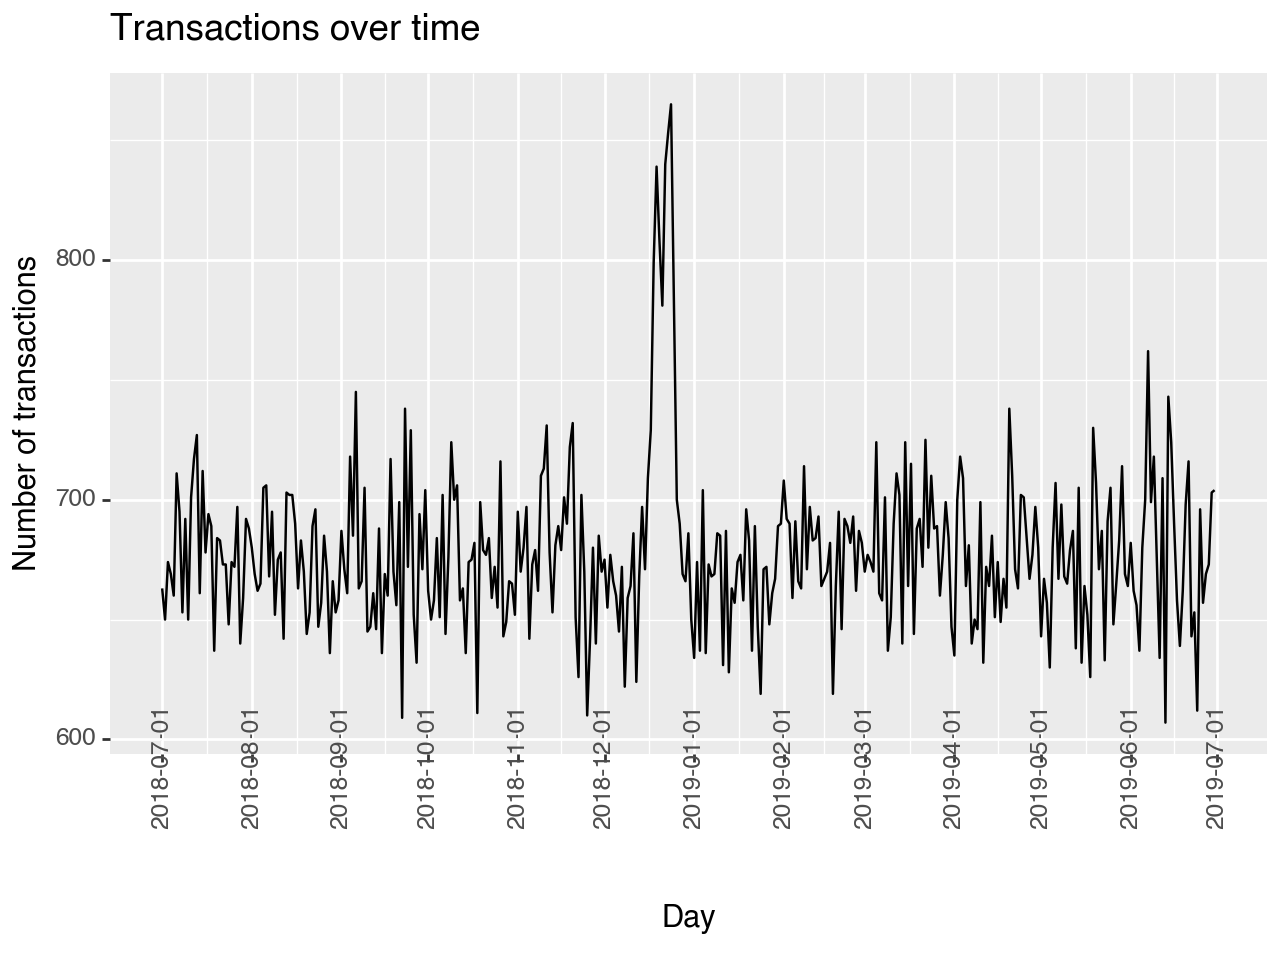

In [61]:
from plotnine import ggplot, aes, geom_line, labs, theme, scale_x_date, element_text

plot = (
    ggplot(transactions_by_date, aes(x='DATE', y='Transaction_Count')) +
    geom_line() +
    labs(x="Day", y="Number of transactions", title="Transactions over time") +
    scale_x_date(breaks="1 month") +
    theme(axis_text_x=element_text(angle=90, vjust=0.5))
)

print(plot)


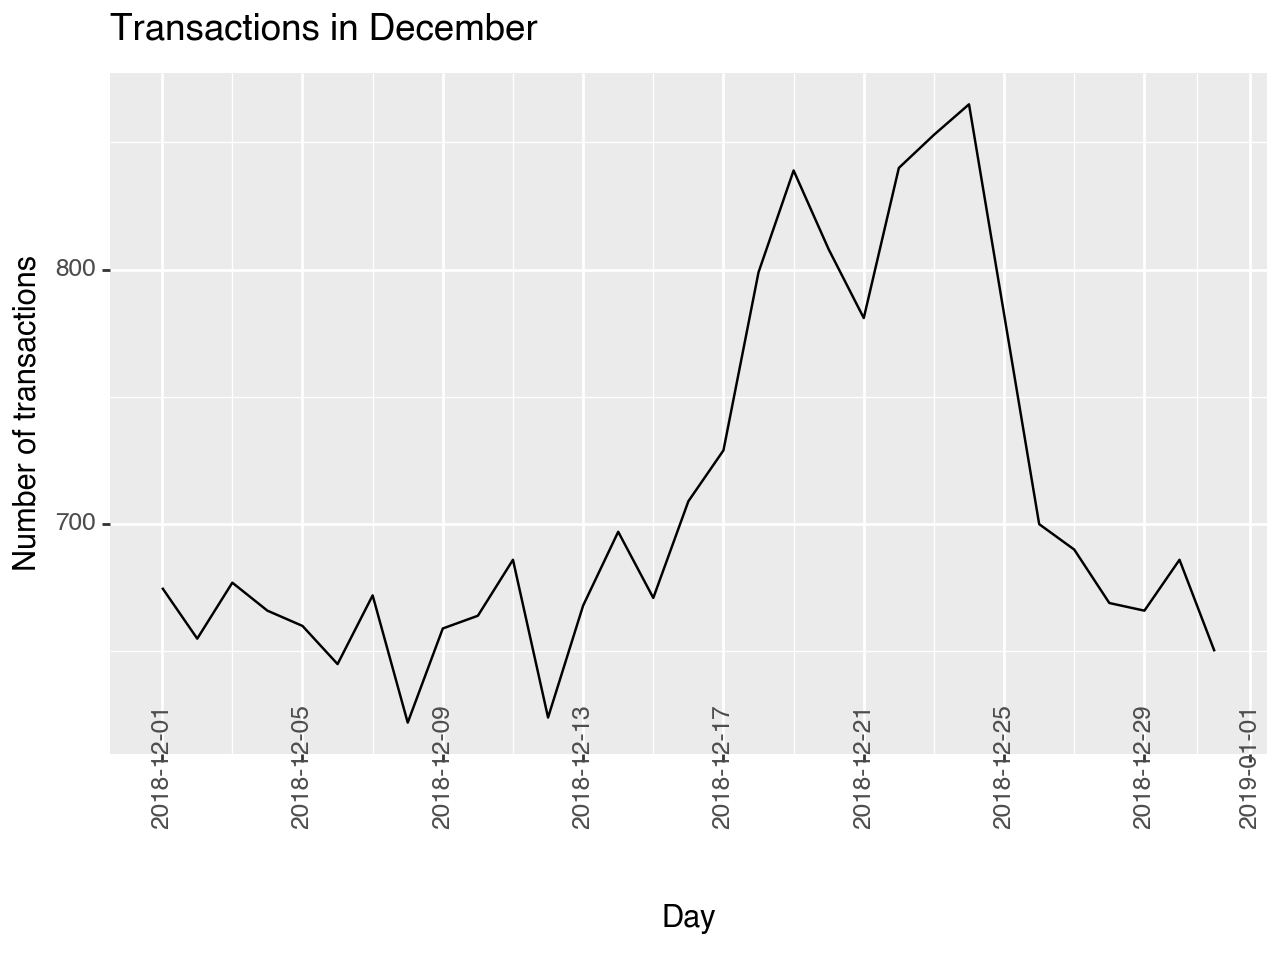

In [62]:
december_data = transactions_by_date[(transactions_by_date['DATE'].dt.month == 12)]

plot_december = (
    ggplot(december_data, aes(x='DATE', y='Transaction_Count')) +
    geom_line() +
    labs(x="Day", y="Number of transactions", title="Transactions in December") +
    theme(axis_text_x=element_text(angle=90, vjust=0.5))
)

print(plot_december)

In [63]:
df_chips['PACK_SIZE'] = df_chips['PROD_NAME'].str.extract('(\d+)').astype(float)

pack_size_counts = df_chips['PACK_SIZE'].value_counts().sort_index()

print("Pack Size Counts:")
print(pack_size_counts)

Pack Size Counts:
PACK_SIZE
70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    40203
160.0     2970
165.0    15297
170.0    19983
175.0    66390
180.0     1468
190.0     2995
200.0     4473
210.0     6272
220.0     1564
250.0     3169
270.0     6285
330.0    12540
380.0     6418
Name: count, dtype: int64


/var/folders/rc/33mvhtrn2qjbk_2zxqdxz1000000gn/T/ipykernel_42430/1557386616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


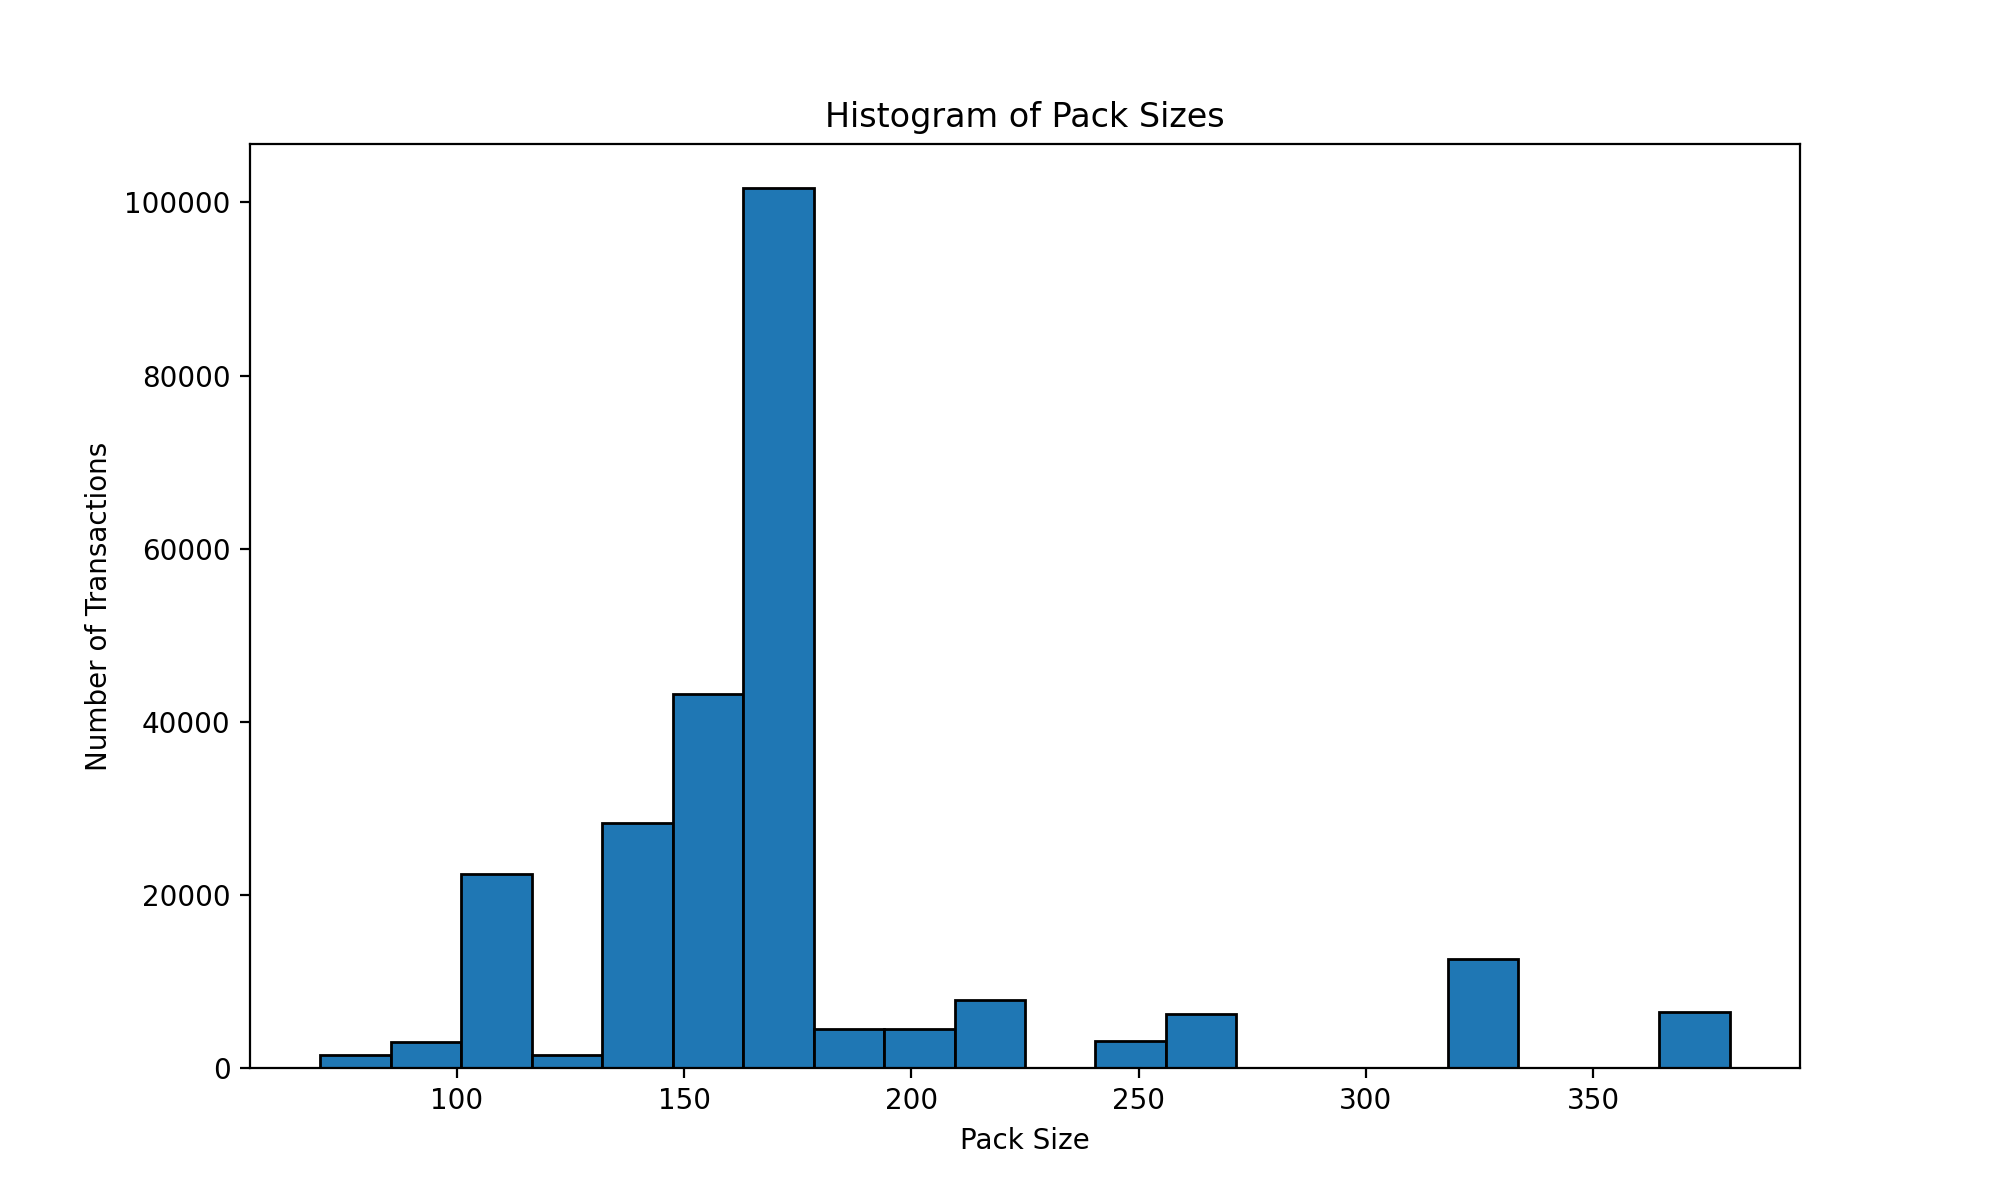

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_chips['PACK_SIZE'], bins=20, edgecolor='black')
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.title('Histogram of Pack Sizes')
plt.show()


In [65]:
df_chips['BRAND'] = df_chips['PROD_NAME'].str.split().str[0]

print("DataFrame with BRAND column:")
print(df_chips[['PROD_NAME', 'BRAND']])

DataFrame with BRAND column:
                                       PROD_NAME     BRAND
0         Natural Chip        Compny SeaSalt175g   Natural
1                       CCs Nacho Cheese    175g       CCs
2         Smiths Crinkle Cut  Chips Chicken 170g    Smiths
3         Smiths Chip Thinly  S/Cream&Onion 175g    Smiths
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g    Kettle
...                                          ...       ...
264831   Kettle Sweet Chilli And Sour Cream 175g    Kettle
264832             Tostitos Splash Of  Lime 175g  Tostitos
264833                  Doritos Mexicana    170g   Doritos
264834   Doritos Corn Chip Mexican Jalapeno 150g   Doritos
264835             Tostitos Splash Of  Lime 175g  Tostitos

[246742 rows x 2 columns]


/var/folders/rc/33mvhtrn2qjbk_2zxqdxz1000000gn/T/ipykernel_42430/1484683483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [66]:
df_chips['BRAND'] = df_chips['BRAND'].replace({'RED': 'RRD'})

print("DataFrame with Cleaned BRAND column:")
print(df_chips[['PROD_NAME', 'BRAND']])


DataFrame with Cleaned BRAND column:
                                       PROD_NAME     BRAND
0         Natural Chip        Compny SeaSalt175g   Natural
1                       CCs Nacho Cheese    175g       CCs
2         Smiths Crinkle Cut  Chips Chicken 170g    Smiths
3         Smiths Chip Thinly  S/Cream&Onion 175g    Smiths
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g    Kettle
...                                          ...       ...
264831   Kettle Sweet Chilli And Sour Cream 175g    Kettle
264832             Tostitos Splash Of  Lime 175g  Tostitos
264833                  Doritos Mexicana    170g   Doritos
264834   Doritos Corn Chip Mexican Jalapeno 150g   Doritos
264835             Tostitos Splash Of  Lime 175g  Tostitos

[246742 rows x 2 columns]


/var/folders/rc/33mvhtrn2qjbk_2zxqdxz1000000gn/T/ipykernel_42430/337938447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Basic Summary Statistics:
       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06


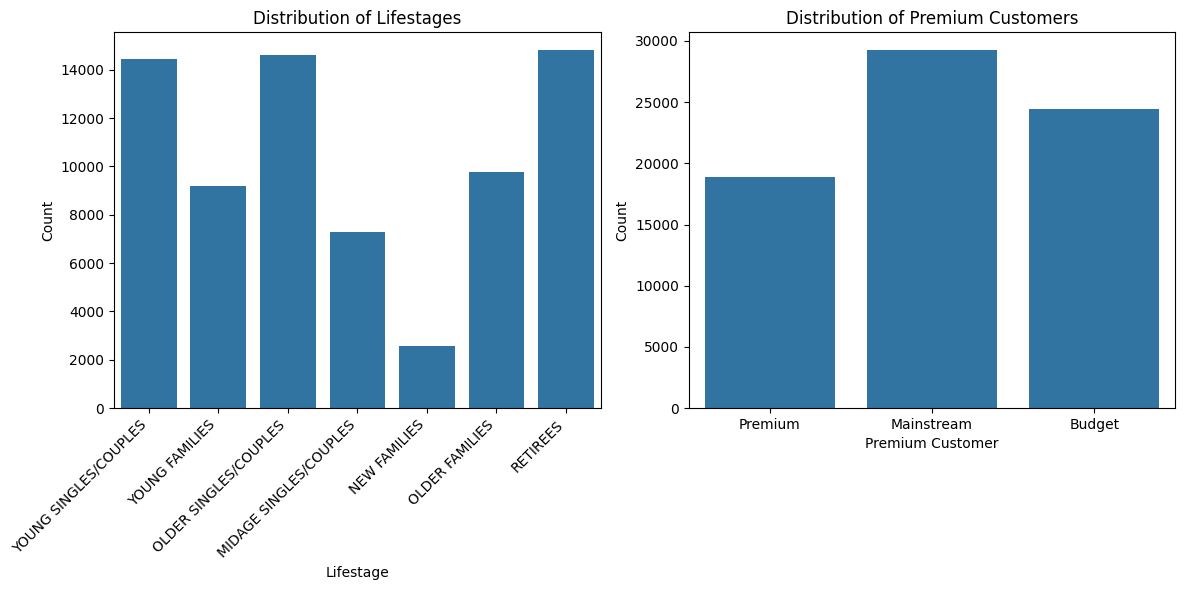

In [24]:
import seaborn as sns

print("Basic Summary Statistics:")
print(df_customerData.describe())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='LIFESTAGE', data=df_customerData)
plt.title('Distribution of Lifestages')
plt.xlabel('Lifestage')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.countplot(x='PREMIUM_CUSTOMER', data=df_customerData)
plt.title('Distribution of Premium Customers')
plt.xlabel('Premium Customer')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [25]:
df_merged = pd.merge(df_transactionData, df_customerData, on='LYLTY_CARD_NBR', how='left')

print("Merged DataFrame:")
print(df_merged)

Merged DataFrame:
             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2088-10-18          1            1000       1         5   
1      2089-05-15          1            1307     348        66   
2      2089-05-21          1            1343     383        61   
3      2088-08-18          2            2373     974        69   
4      2088-08-19          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2089-03-10        272          272319  270088        89   
264832 2088-08-14        272          272358  270154        74   
264833 2088-11-07        272          272379  270187        51   
264834 2088-12-28        272          272379  270188        42   
264835 2088-09-23        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese   

In [27]:
missing_customers = df_merged[df_merged['LIFESTAGE'].isnull() | df_merged['PREMIUM_CUSTOMER'].isnull()]

print("Transactions with Missing Customer Details:")
print(missing_customers)

Transactions with Missing Customer Details:
Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [28]:
df_merged.to_csv("QVI_data.csv", index=False)

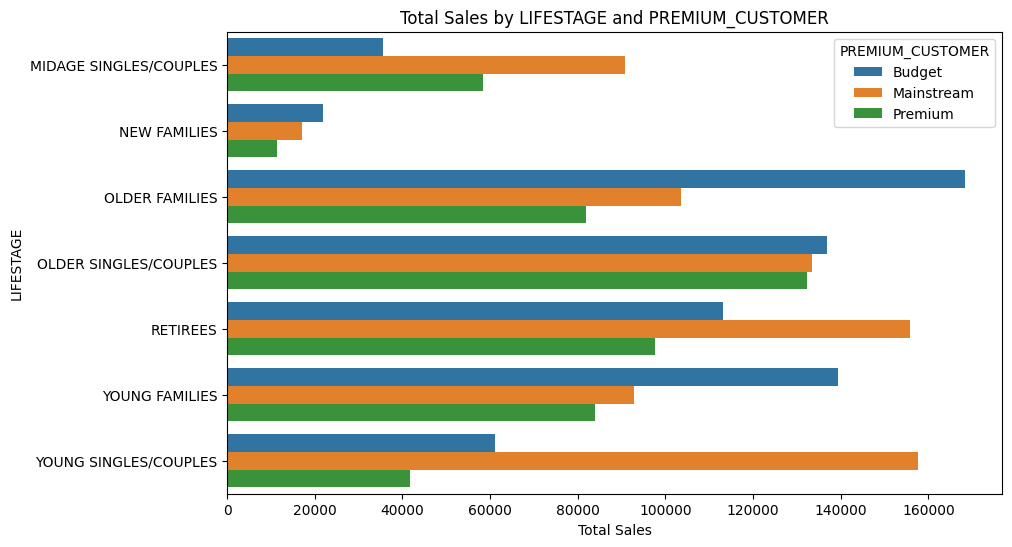

In [30]:
total_sales_by_segment = df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='TOT_SALES', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=total_sales_by_segment, errorbar=None)
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Total Sales')
plt.ylabel('LIFESTAGE')
plt.show()

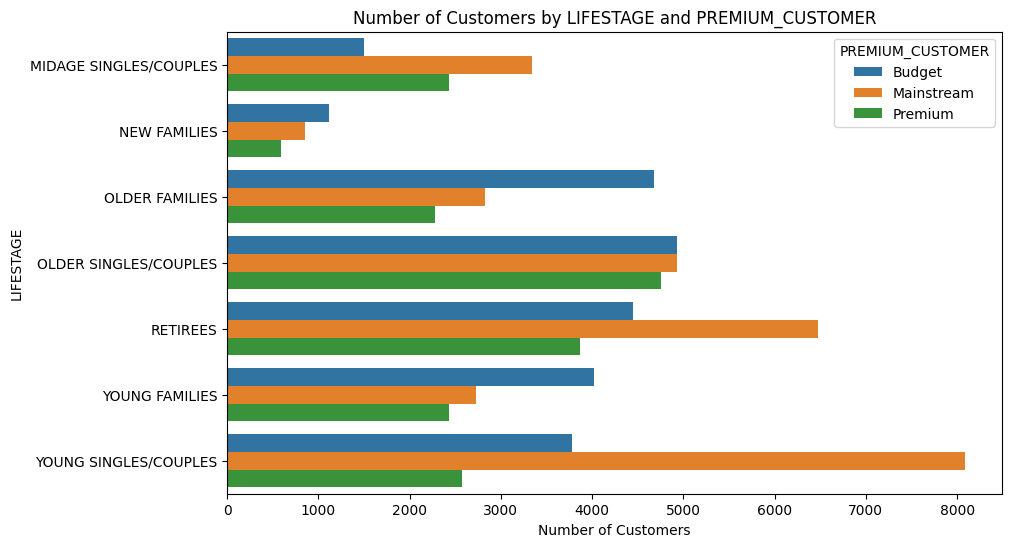

In [31]:
customer_count_by_segment = df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='LYLTY_CARD_NBR', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=customer_count_by_segment, errorbar=None)
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Number of Customers')
plt.ylabel('LIFESTAGE')
plt.show()

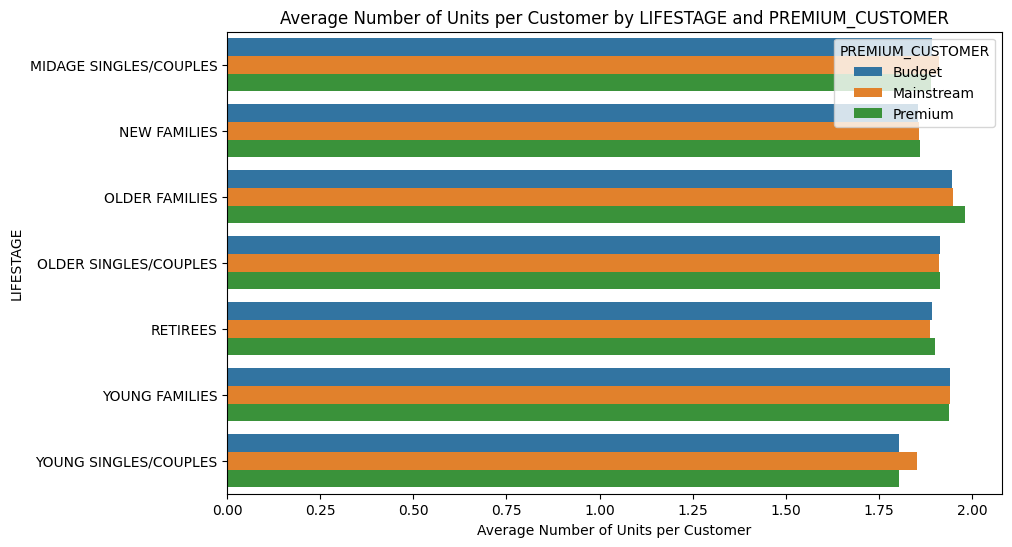

In [32]:
average_units_per_customer = df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='PROD_QTY', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=average_units_per_customer, errorbar=None)
plt.title('Average Number of Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Average Number of Units per Customer')
plt.ylabel('LIFESTAGE')
plt.show()